In [1]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
import warnings
warnings.filterwarnings("ignore") #경고문구 표시 X

In [3]:
import pandas as pd
import numpy as np
import folium
import re
from plotnine import *

In [6]:
myMap=folium.Map(location=[35.5,126.5],zoom_start=12)
myMap

In [7]:
myMap=folium.Map(location=[35.5,126.5],zoom_start=12,tiles="stamen Terrain")
myMap

In [16]:
myMap=folium.Map(location=[35.5,126.5],zoom_start=12,tiles="stamen Terrain")
folium.Marker([35.5,126.5],popup="연습", icon=folium.Icon(icon="cloud",color="red")).add_to(myMap)
folium.Marker([35.8,126.9],popup="연습2").add_to(myMap)
myMap

In [21]:
myMap=folium.Map(location=[35.5,126.5],zoom_start=12)
folium.CircleMarker([35.5,126.5], raius=500, color="#0000ff", fill_color="#0000ff",popup="land").add_to(myMap)
myMap

In [24]:
myMap=folium.Map(location=[35.5,126.5],zoom_start=12)
folium.CircleMarker([35.5,126.5], raius=500, color="#0000ff", fill_color="#0000ff",popup="land").add_to(myMap)
folium.RegularPolygonMarker([35.5,126.5],number_of_sides=3,color="#ff0000", fill_color="#0000ff",popup="land").add_to(myMap)
myMap

In [26]:
park=pd.read_csv("전국도시공원표준데이터.csv",encoding="euc-kr")

In [28]:
park.shape

(16730, 20)

In [29]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,NaN,NaN,NaN,NaN,NaN,1990-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,NaN,NaN,NaN,NaN,NaN,1991-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN


In [30]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 20 columns):
관리번호            16730 non-null object
공원명             16730 non-null object
공원구분            16730 non-null object
소재지도로명주소        8505 non-null object
소재지지번주소         15876 non-null object
위도              16730 non-null float64
경도              16730 non-null float64
공원면적            16730 non-null float64
공원보유시설(운동시설)    4370 non-null object
공원보유시설(유희시설)    6353 non-null object
공원보유시설(편익시설)    4559 non-null object
공원보유시설(교양시설)    1038 non-null object
공원보유시설(기타시설)    2835 non-null object
지정고시일           13754 non-null object
관리기관명           16017 non-null object
전화번호            15603 non-null object
데이터기준일자         16730 non-null object
제공기관코드          16730 non-null object
제공기관명           16730 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.6+ MB


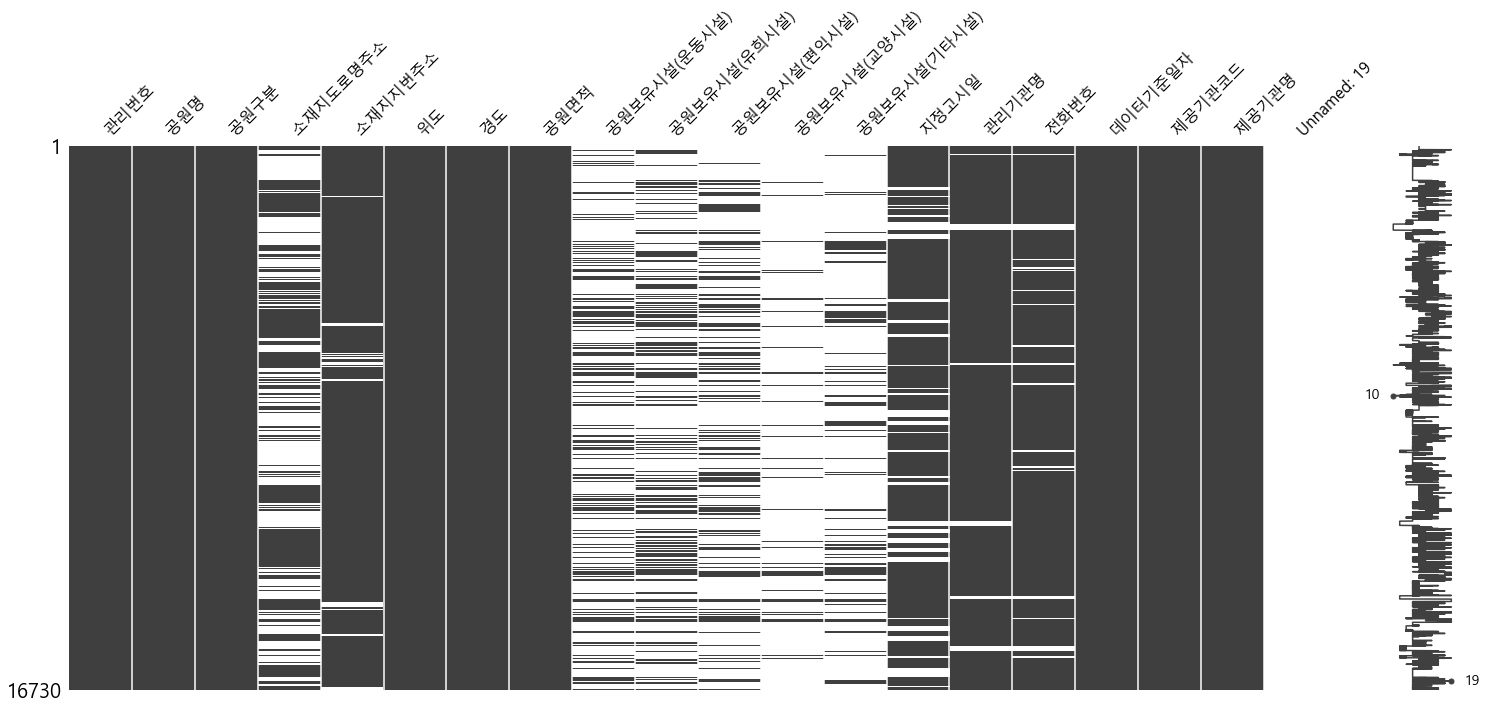

In [32]:
import missingno as msno
msno.matrix(park)

In [36]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [37]:
park.drop(columns=[ '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명','제공기관코드', '제공기관명','Unnamed: 19'],inplace=True)

In [38]:
park.shape

(16730, 11)

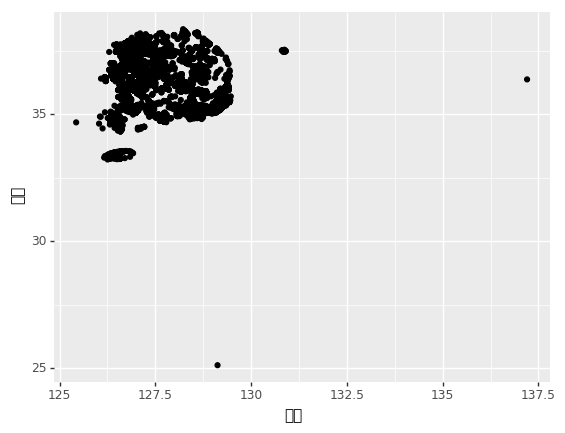

<ggplot: (-9223371908828841633)>

In [43]:
(ggplot(park)+aes(x='경도',y='위도')+geom_point())

In [44]:
park.dtypes

관리번호             object
공원명              object
공원구분             object
소재지도로명주소         object
소재지지번주소          object
위도              float64
경도              float64
공원면적            float64
공원보유시설(운동시설)     object
전화번호             object
데이터기준일자          object
dtype: object

In [45]:
park["공원면적"]

0         87710.3
1         13383.5
2        170920.6
3         34840.3
4         10315.0
5         14313.6
6         34505.3
7         48063.4
8         22483.2
9        133120.0
10       100811.0
11        11024.0
12       343538.5
13       368907.0
14         2960.0
15         2056.0
16         2496.5
17         3515.4
18         3860.5
19         3817.5
20         4205.0
21         3529.3
22         2330.0
23         2205.9
24         1747.8
25         2578.5
26         1873.1
27         1666.0
28         1500.0
29         3414.0
           ...   
16700      1131.0
16701      1345.0
16702      1411.0
16703      5209.0
16704      1704.0
16705      3916.0
16706      1679.0
16707      2904.0
16708      5896.0
16709      1501.0
16710      1549.0
16711      1565.0
16712      6945.0
16713      2119.0
16714      1588.0
16715     77256.0
16716      2633.0
16717      1804.0
16718      3075.0
16719      4260.0
16720      2466.0
16721      2395.0
16722      1142.0
16723      1612.0
16724     

In [51]:
x="123,456"

In [52]:
x=x.replace(",","")
x=int(x)
x+1

123457

In [53]:
park["공원면적비율"]=park["공원면적"].apply(lambda x: np.sqrt(x))

In [54]:
park["공원면적비율"].head()

0    296.159248
1    115.687078
2    413.425447
3    186.655565
4    101.562788
Name: 공원면적비율, dtype: float64

In [58]:
park["소재지도로명주소"].isnull().sum()

8225

In [60]:
park["소재지도로명주소"].fillna(park["소재지지번주소"], inplace=True)

In [62]:
park["소재지도로명주소"].isnull().sum()

0

In [63]:
park["소재지지번주소"].fillna(park["소재지도로명주소"], inplace=True)

In [64]:
park["소재지지번주소"].isnull().sum()

0

In [69]:
park['시도']=park["소재지도로명주소"].str.split(" ",expand=True)[0]
park['구군']=park["소재지도로명주소"].str.split(" ",expand=True)[1]

In [75]:
park_loc_notnull=park[(park["위도"]>32) & (park["경도"]<132) & park["시도"].notnull()]

In [76]:
park_loc_notnull['시도'].value_counts()

경기도        3241
경상남도       1826
충청남도       1708
서울특별시      1614
전라북도       1142
전라남도        925
충청북도        910
경상북도        849
울산광역시       833
강원도         736
부산광역시       659
인천광역시       604
대구광역시       580
대전광역시       424
광주광역시       362
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

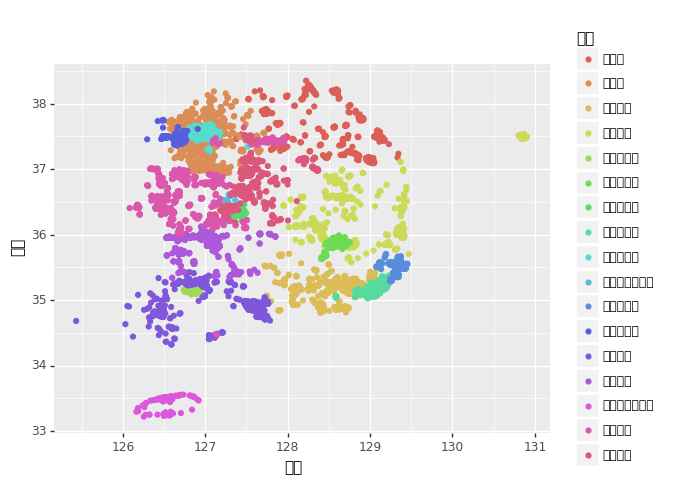

<ggplot: (128031553221)>

In [77]:
(ggplot(park_loc_notnull)+aes(x="경도",y="위도",color="시도")+geom_point())

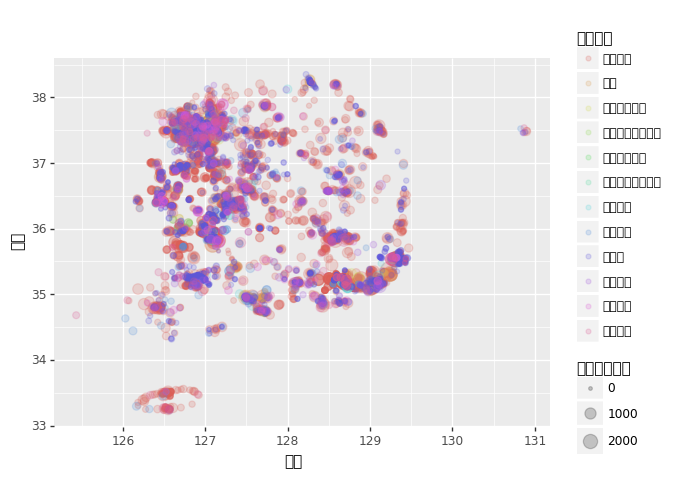

<ggplot: (128031352093)>

In [81]:
(ggplot(park_loc_notnull[park_loc_notnull['공원구분']!="어린이공원"])
 +aes(x="경도",y="위도",color="공원구분",size="공원면적비율")
 +geom_point(alpha=0.2))

In [86]:
park_do=pd.DataFrame(park['시도'].value_counts())

In [87]:
park_do

,시도
경기도,3241
경상남도,1826
충청남도,1708
서울특별시,1614
전라북도,1142
전라남도,925
충청북도,911
경상북도,849
울산광역시,833
강원도,736


In [88]:
park_do_nor=pd.DataFrame(park['시도'].value_counts(normalize=True))

In [90]:
park_sido=park_do_nor+park_do

,시도
경기도,0.193724
경상남도,0.109145
충청남도,0.102092
서울특별시,0.096473
전라북도,0.068261
전라남도,0.055290
충청북도,0.054453
경상북도,0.050747
울산광역시,0.049791
강원도,0.043993


In [96]:
park_sido=park_do.merge(park_do_nor,left_index=True,right_index=True).reset_index()
park_sido.columns=['시도','합계','비율']
park_sido

,시도,합계,비율
0,경기도,3241,0.193724
1,경상남도,1826,0.109145
2,충청남도,1708,0.102092
3,서울특별시,1614,0.096473
4,전라북도,1142,0.068261
5,전라남도,925,0.055290
6,충청북도,911,0.054453
7,경상북도,849,0.050747
8,울산광역시,833,0.049791
9,강원도,736,0.043993


In [97]:
park_sido.sort_values(by=["합계"],ascending=True)

,시도,합계,비율
16,세종특별자치시,70,0.004184
15,제주특별자치도,245,0.014644
14,광주광역시,362,0.021638
13,대전광역시,424,0.025344
12,대구광역시,580,0.034668
11,인천광역시,604,0.036103
10,부산광역시,660,0.039450
9,강원도,736,0.043993
8,울산광역시,833,0.049791
7,경상북도,849,0.050747


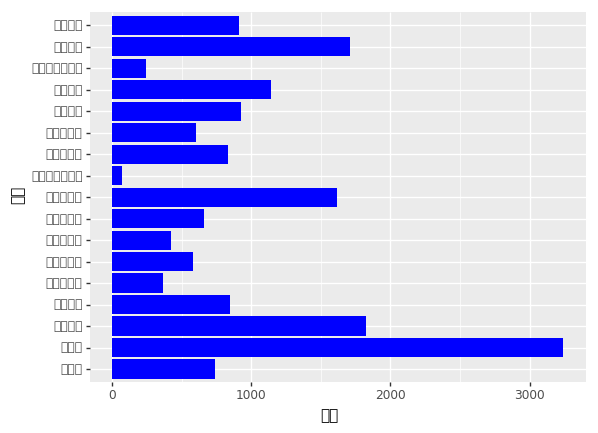

<ggplot: (-9223371908823922190)>

In [102]:
(ggplot(park_sido)+aes(x="시도",y="합계")+geom_bar(stat="identity",position='dodge',fill='blue')+coord_flip())

In [103]:
park_type=park["공원구분"].value_counts().reset_index()

In [104]:
park_type.columns=["공원구분","합계"]

In [118]:
seoul=park[park['시도']=='서울특별시']
seoul=seoul[(seoul['위도']>37.4) & (seoul['경도']<127.4)]

In [110]:
seoul_park=seoul["공원구분"].value_counts().reset_index()
seoul_park.columns=["r공원구분","합계"]

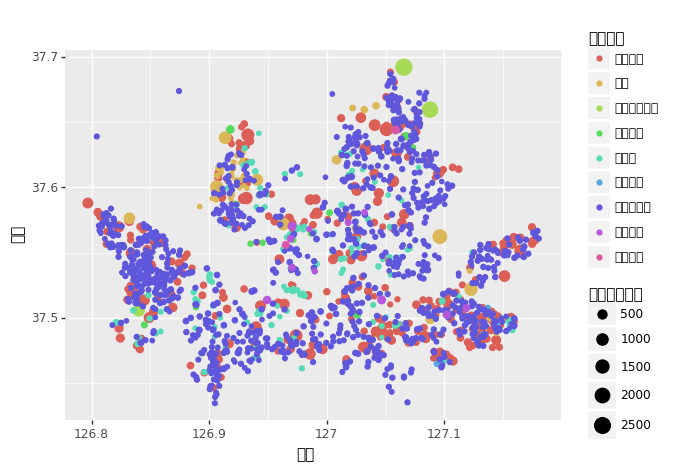

<ggplot: (-9223371908824033227)>

In [119]:
(ggplot(seoul)+aes(x='경도',y='위도',color='공원구분',size='공원면적비율')+geom_point())

In [122]:
wonju=park[park['구군']=='원주시']

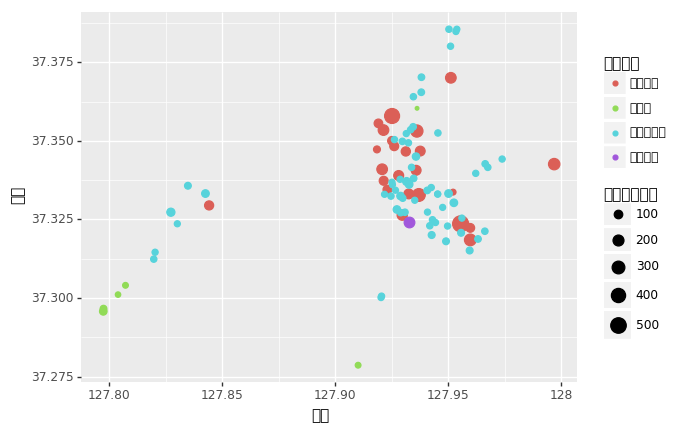

<ggplot: (128030741624)>

In [123]:
(ggplot(wonju)+aes(x='경도',y='위도',color='공원구분',size='공원면적비율')+geom_point())

In [125]:
wonju['공원구분'].value_counts()

어린이공원    62
근린공원     24
소공원       6
체육공원      1
Name: 공원구분, dtype: int64